# Table of Contents

1. [Data Quality Analysis](#data-quality-analysis)
2. [Analysis of Retention Characteristics](#analysis-of-retention-characteristics)

In [604]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Quality Analysis

In [605]:
# Load dataset and examine basic info
data = pd.read_csv('/Users/joyceshi/Desktop/retention_analysis-main/dummy_customer_file.csv')

data_info = data.info()
data_head = data.head()

data_info
data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134612 entries, 0 to 134611
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   oid                          134610 non-null  object 
 1   provider                     134610 non-null  object 
 2   total_charges                134610 non-null  float64
 3   signup_date                  134610 non-null  object 
 4   is_canceled                  134610 non-null  object 
 5   is_active                    134610 non-null  object 
 6   is_delinquent                134610 non-null  object 
 7   conversion_date              80759 non-null   object 
 8   cancellation_date            33518 non-null   object 
 9   current_mrr                  134610 non-null  float64
 10  personal_person_geo_country  105503 non-null  object 
 11  converted                    134610 non-null  object 
dtypes: float64(2), object(10)
memory usage: 12.3+ MB


/var/folders/7q/p2y2lph10_g5dtx7_zb058100000gn/T/ipykernel_11377/594717278.py:2: DtypeWarning: Columns (4,5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/joyceshi/Desktop/retention_analysis-main/dummy_customer_file.csv')


,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted
0,273624174263463,apple,10.94,2021-04-20,True,False,False,2021-04-20,2021-05-20T12:00:00.000+00:00,0.00,France,True
1,532534633483904,apple,10.92,2021-04-20,True,False,False,2021-04-20,2021-06-20T12:00:00.000+00:00,0.00,United Kingdom of Great Britain and Northern I...,True
2,623527156674739,apple,0.00,2021-04-20,False,False,False,NaN,NaN,0.00,Germany,False
3,441616357320658,apple,90.30,2021-04-20,False,True,False,2021-04-27,NaN,3.47,Switzerland,True
4,189644194376891,apple,79.98,2021-04-20,False,True,False,2021-05-04,NaN,3.33,United States of America,True


In [606]:
# Checking column data types
print("Column Data Types:")
print(data.dtypes)

Column Data Types:
oid                             object
provider                        object
total_charges                  float64
signup_date                     object
is_canceled                     object
is_active                       object
is_delinquent                   object
conversion_date                 object
cancellation_date               object
current_mrr                    float64
personal_person_geo_country     object
converted                       object
dtype: object


In [607]:
# Checking for invalid or unexpected values in specific columns
bool_cols = ['is_canceled', 'is_active', 'is_delinquent', 'converted']
for col in bool_cols:
    print(f"Unique values in '{col}': {data[col].unique()}")

print('\n')

date_cols = ['signup_date', 'conversion_date', 'cancellation_date']
for col in date_cols:
    print(f"Invalid dates in '{col}' (non-datetime values converted to NaT):")
    print(pd.to_datetime(data[col], errors='coerce').isna().sum(), "invalid dates")

Unique values in 'is_canceled': [True False nan]
Unique values in 'is_active': [False True nan]
Unique values in 'is_delinquent': [False True nan]
Unique values in 'converted': [True False nan]


Invalid dates in 'signup_date' (non-datetime values converted to NaT):
2 invalid dates
Invalid dates in 'conversion_date' (non-datetime values converted to NaT):
53853 invalid dates
Invalid dates in 'cancellation_date' (non-datetime values converted to NaT):
101094 invalid dates


In [608]:
# Checking for duplicate data entries
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1


In [609]:
# Checking for outliers/missing data in numerical columns
num_columns = ['total_charges', 'current_mrr']
for col in num_columns:
    print(f"Summary statistics for '{col}':")
    print(data[col].describe())
    missing_count = data[col].isna().sum()
    print(f"Column '{col}' has {missing_count} missing values.")
    print("\n")

Summary statistics for 'total_charges':
count    134610.000000
mean         24.859945
std          31.305221
min        -119.980000
25%           0.000000
50%           8.410000
75%          54.990000
max         293.580000
Name: total_charges, dtype: float64
Column 'total_charges' has 2 missing values.


Summary statistics for 'current_mrr':
count    134610.000000
mean          2.081608
std           3.042637
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          23.140000
Name: current_mrr, dtype: float64
Column 'current_mrr' has 2 missing values.




In [610]:
# Checking for inconsistencies in country names
print("Unique country values:")
print(data['personal_person_geo_country'].unique())

Unique country values:
['France' 'United Kingdom of Great Britain and Northern Ireland' 'Germany'
 'Switzerland' 'United States of America' 'Hungary' 'Brazil' 'Sweden'
 'Canada' 'Spain' 'Netherlands' 'Ukraine' 'Finland' 'Korea (Republic of)'
 'Japan' 'Australia' 'Russian Federation' 'Czechia' 'Kuwait' 'Iceland'
 'Italy' 'New Zealand' 'Greece' 'Denmark' 'Israel' 'Poland' 'Norway'
 'Slovenia' 'Lithuania' 'Hong Kong' 'Philippines' 'Malta' 'Slovakia'
 'China' 'Belarus' 'Mexico' 'Trinidad and Tobago' 'South Africa'
 'Singapore' 'Turkey' 'Chile' 'Luxembourg' 'Austria' 'India' 'Ireland'
 'Romania' 'Belgium' 'Taiwan, Province of China' 'Uruguay' 'Saudi Arabia'
 'Croatia' 'Estonia' 'Malaysia' 'United Arab Emirates' 'Portugal'
 'Indonesia' 'Qatar' 'Dominican Republic' 'Viet Nam' 'Kyrgyzstan' 'Egypt'
 'Bulgaria' 'Thailand' 'Argentina' 'Colombia' 'Cambodia' 'Peru' 'Mongolia'
 'Latvia' 'Moldova (Republic of)' 'Costa Rica' 'Georgia' 'Pakistan'
 'Sri Lanka' 'Bahrain' 'Bolivia (Plurinational State of)

In [611]:
# Summarizing missing values
print("Summary of Missing Values:")
print(data.isnull().sum())

Summary of Missing Values:
oid                                 2
provider                            2
total_charges                       2
signup_date                         2
is_canceled                         2
is_active                           2
is_delinquent                       2
conversion_date                 53853
cancellation_date              101094
current_mrr                         2
personal_person_geo_country     29109
converted                           2
dtype: int64


CLEANING THE DATA

In [612]:
# Fixing data type inconsistencies for dates/times
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')

In [613]:
# Dropping duplicate rows
data = data.drop_duplicates()

In [614]:
# Standardizing country names (note: only consolidating alternative names for the same country/region, not making other judgments on country affiliation)
data['personal_person_geo_country'] = data['personal_person_geo_country'].str.strip().str.lower()

country_mapping = {
    "united kingdom of great britain and northern ireland": "united kingdom",
    "united states of america": "united states",
    "viet nam": "vietnam",
    "bolivia (plurinational state of)": "bolivia",
    "türkiye": "turkey",
    "taiwan, province of china": "taiwan",
    "macedonia (fyrom)": "north macedonia",
    "venezuela (bolivarian republic of)": "venezuela",
    "the bahamas": "bahamas"
}

data['personal_person_geo_country'] = data['personal_person_geo_country'].replace(country_mapping)

In [615]:
# Handling missing values
# Taking a peek in the data, we see that there's a row where all columns are empty -- let's remove that
data.dropna(subset=['oid'], inplace=True)

# Now, we're only missing certain date and country data entries
print("Summary of Missing Values:")
print(data.isnull().sum())

Summary of Missing Values:
oid                                 0
provider                            0
total_charges                       0
signup_date                         0
is_canceled                         0
is_active                           0
is_delinquent                       0
conversion_date                 53851
cancellation_date              101092
current_mrr                         0
personal_person_geo_country     29107
converted                           0
dtype: int64


In [616]:
# For missing conversion_date data, let's check that the user converted at all -- if not, then the NaT is fine for now
conversion_flags = data[
    ((data['converted'] == True) & (data['conversion_date'].isna())) |
    ((data['converted'] == False) & (data['conversion_date'].notna()))
]
print(f"Number of conversion flags: {conversion_flags.shape[0]}")

# For missing cancellation_date data, let's check that the user canceled at all -- if not, then the NaT is fine for now
cancellation_flags = data[
    ((data['is_canceled'] == True) & (data['cancellation_date'].isna())) |
    ((data['is_canceled'] == False) & (data['cancellation_date'].notna()))
]
print(f"Number of cancellation flags: {cancellation_flags.shape[0]}") # These may indicate resurrected customers or canceled ongoing plans that will still be active until a certain date

# For missing country data, let's use "unspecified" as a filler indicator
data['personal_person_geo_country'].fillna('unspecified', inplace=True)

Number of conversion flags: 0
Number of cancellation flags: 87


In [617]:
# Summary of final cleaned data
print("Cleaned Data Types:")
print(data.dtypes)

print("\nMissing Values After Cleaning:")
print(data.isnull().sum())

print("\nPreview of Final Cleaned Data:")
data.head()

Cleaned Data Types:
oid                                         object
provider                                    object
total_charges                              float64
signup_date                         datetime64[ns]
is_canceled                                 object
is_active                                   object
is_delinquent                               object
conversion_date                     datetime64[ns]
cancellation_date              datetime64[ns, UTC]
current_mrr                                float64
personal_person_geo_country                 object
converted                                   object
dtype: object

Missing Values After Cleaning:
oid                                 0
provider                            0
total_charges                       0
signup_date                         0
is_canceled                         0
is_active                           0
is_delinquent                       0
conversion_date                 53851
cancellation_date 

,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted
0,273624174263463,apple,10.94,2021-04-20,True,False,False,2021-04-20,2021-05-20 12:00:00+00:00,0.00,france,True
1,532534633483904,apple,10.92,2021-04-20,True,False,False,2021-04-20,2021-06-20 12:00:00+00:00,0.00,united kingdom,True
2,623527156674739,apple,0.00,2021-04-20,False,False,False,NaT,NaT,0.00,germany,False
3,441616357320658,apple,90.30,2021-04-20,False,True,False,2021-04-27,NaT,3.47,switzerland,True
4,189644194376891,apple,79.98,2021-04-20,False,True,False,2021-05-04,NaT,3.33,united states,True


# Analysis of Retention Characteristics
1. [Segmented Analysis](#segmented-analysis)
- How is retention trending for different starting cohorts, based on when they signed up?
- How is retention trending for different starting cohorts, filtering to the subset that converts to a paid plan?
- How does retention vary by geography?
- How does retention vary by provider? 

2. [Customer Behavior Analysis](#customer-behavior-analysis)
- What is the average lifetime value of a customer? How does this differ for specific segments (e.g., geography or provider)?
- What does the conversion rate to paid plans look like? What is the typical time lag between signup and conversion?
- For those that cancel their paid plans, what is the time lag between conversion and cancellation?
- Do delinquency rates rise as time since signup increases? 
- What percentage of delinquent users eventually churn? 

3. [Churn and Resurrection](#churn-and-resurrection)
- Among customers who cancel their paid plans, what percentage reactivate their subscriptions later? How long does it typically take for customers to reactivate?
- Are there identifiable patterns among customers who churn (e.g., geography, provider, payment delinquency)? Does seasonality affect churn rates?

4. [Revenue Analysis](#revenue-analysis)
- How does customer retention compare with revenue retention?
- Is there evidence of revenue expansion at the customer level?
- Are there different spending trends for different customer cohorts over time?

## Segmented Analysis
How is retention trending for different starting cohorts, based on when they signed up?
- Analysis on a weekly and monthly basis for cohorts
- Using January 16, 2023 as the most recent reference point (i.e. the cohort for 0 weeks since customer sign-up is the January 10-16 group, the cohort for 0 months since customer sign-up is the January 2023 group)

In [618]:
# Extracting cohorts by signup date
data['cohort_month'] = data['signup_date'].dt.to_period('M')
data['cohort_week'] = data['signup_date'].dt.to_period('W')
data['cohort_day'] = data['signup_date'].dt.to_period('D')

# Using most recent signup date as reference date
reference_date = pd.Timestamp('2023-01-16')

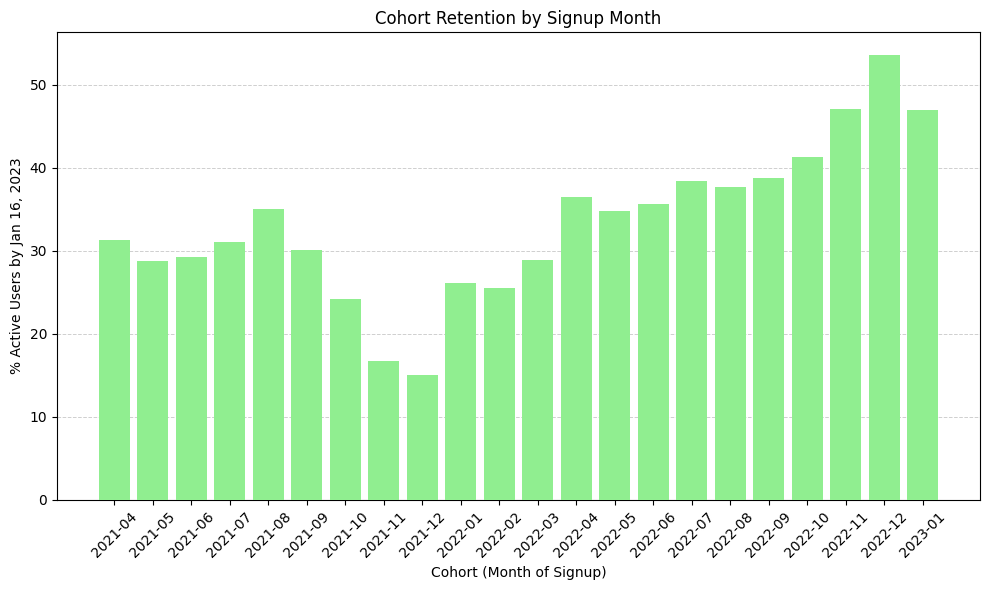

In [619]:
# BY MONTHLY STARTING COHORT
# Calculating retention for each cohort (active paying users on reference date)
m_cohort_sizes = data.groupby('cohort_month').size()
m_active = data[data['is_active'] == True].groupby('cohort_month').size()
m_retention = (m_active/m_cohort_sizes) * 100

# Visualization of results
plt.figure(figsize=(10, 6))
plt.bar(m_retention.index.astype(str), m_retention.values, color='lightgreen', zorder=3)
plt.xlabel('Cohort (Month of Signup)')
plt.ylabel('% Active Users by Jan 16, 2023')
plt.title('Cohort Retention by Signup Month')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)
plt.tight_layout()
plt.show()

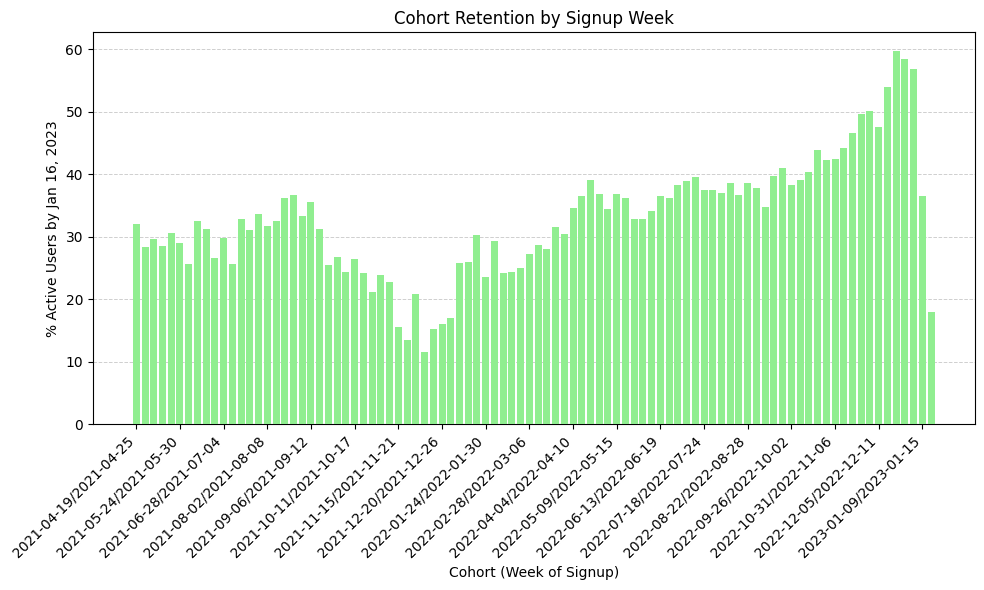

In [620]:
# BY WEEKLY STARTING COHORT
# Calculating retention for each cohort (active users on reference date)
w_cohort_sizes = data.groupby('cohort_week').size()
w_active = data[data['is_active'] == True].groupby('cohort_week').size()
w_retention = (w_active/w_cohort_sizes) * 100

# Visualization of results
plt.figure(figsize=(10, 6))
plt.bar(w_retention.index.astype(str), w_retention.values, color='lightgreen', zorder=3)
plt.xlabel('Cohort (Week of Signup)')
plt.ylabel('% Active Users by Jan 16, 2023')
plt.title('Cohort Retention by Signup Week')
ticks = range(0, len(w_retention), 5)
plt.xticks(ticks, [str(w_retention.index[i]) for i in ticks], rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)
plt.tight_layout()
plt.show()

How is retention trending for different starting cohorts, filtering to the subset that converts to a paid plan?
- We care not only about overall retention, but also about the paid plan conversion rate and subsequent retention.
- In other words, how many people are canceling vs. keeping their paid plans?

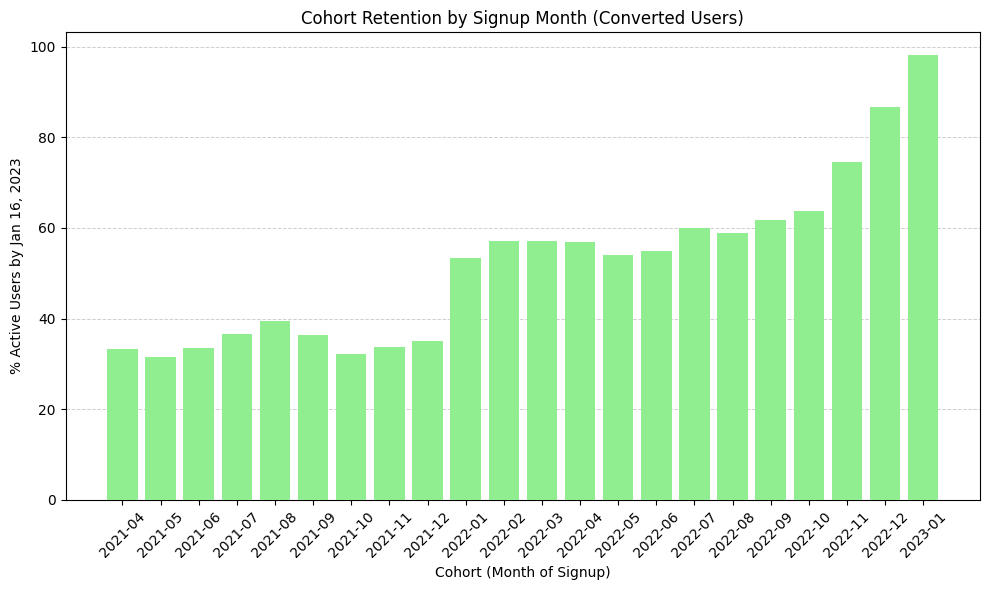

In [621]:
# Filter the data to include only users who have converted to a paid plan
converted_customers = data[data['converted'] == True]

# BY MONTHLY STARTING COHORT (only for converted users)
# Calculating the cohort sizes and retention for users who converted
m_cohort_sizes_converted = converted_customers.groupby('cohort_month').size()
m_active_converted = converted_customers[converted_customers['is_active'] == True].groupby('cohort_month').size()
m_retention_converted = (m_active_converted / m_cohort_sizes_converted) * 100

# Visualization of results
plt.figure(figsize=(10, 6))
plt.bar(m_retention_converted.index.astype(str), m_retention_converted.values, color='lightgreen', zorder=3)
plt.xlabel('Cohort (Month of Signup)')
plt.ylabel('% Active Users by Jan 16, 2023')
plt.title('Cohort Retention by Signup Month (Converted Users)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)
plt.tight_layout()
plt.show()


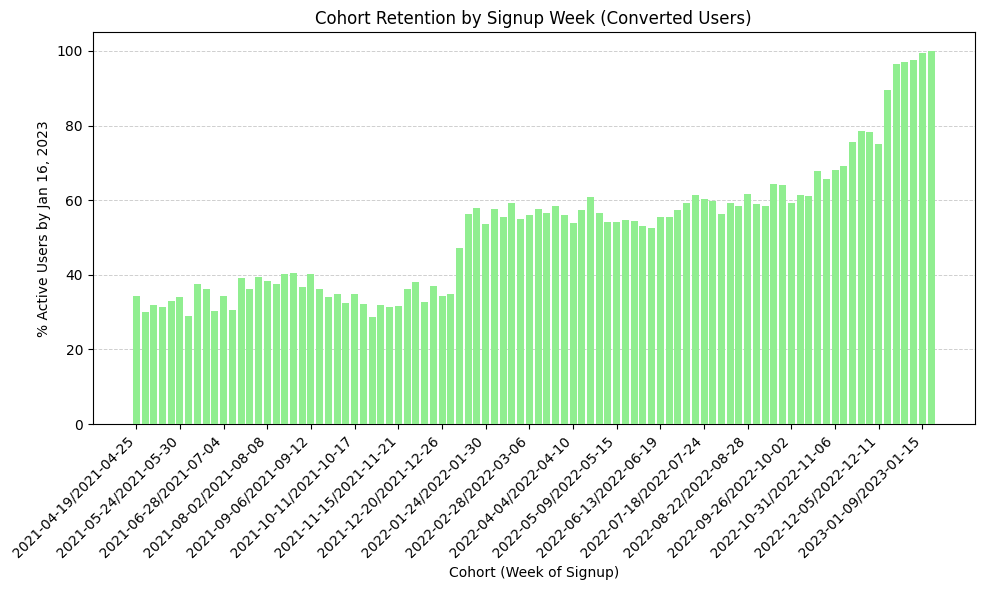

In [622]:
# BY WEEKLY STARTING COHORT (only for converted users)
# Calculating the cohort sizes and retention for users who converted
w_cohort_sizes_converted = converted_customers.groupby('cohort_week').size()
w_active_converted = converted_customers[converted_customers['is_active'] == True].groupby('cohort_week').size()
w_retention_converted = (w_active_converted / w_cohort_sizes_converted) * 100

# Visualization of results (Weekly Cohorts)
plt.figure(figsize=(10, 6))
plt.bar(w_retention_converted.index.astype(str), w_retention_converted.values, color='lightgreen', zorder=3)
plt.xlabel('Cohort (Week of Signup)')
plt.ylabel('% Active Users by Jan 16, 2023')
plt.title('Cohort Retention by Signup Week (Converted Users)')
ticks = range(0, len(w_retention_converted), 5)
plt.xticks(ticks, [str(w_retention_converted.index[i]) for i in ticks], rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)
plt.tight_layout()
plt.show()

How does retention vary by geography?
- We see that retention appears to vary by geography, but doing this naively isn't a great metric since there are imbalanced sample sizes by geography. We can group into larger regions (by continent, for example) to get a better sense of any actual differential.

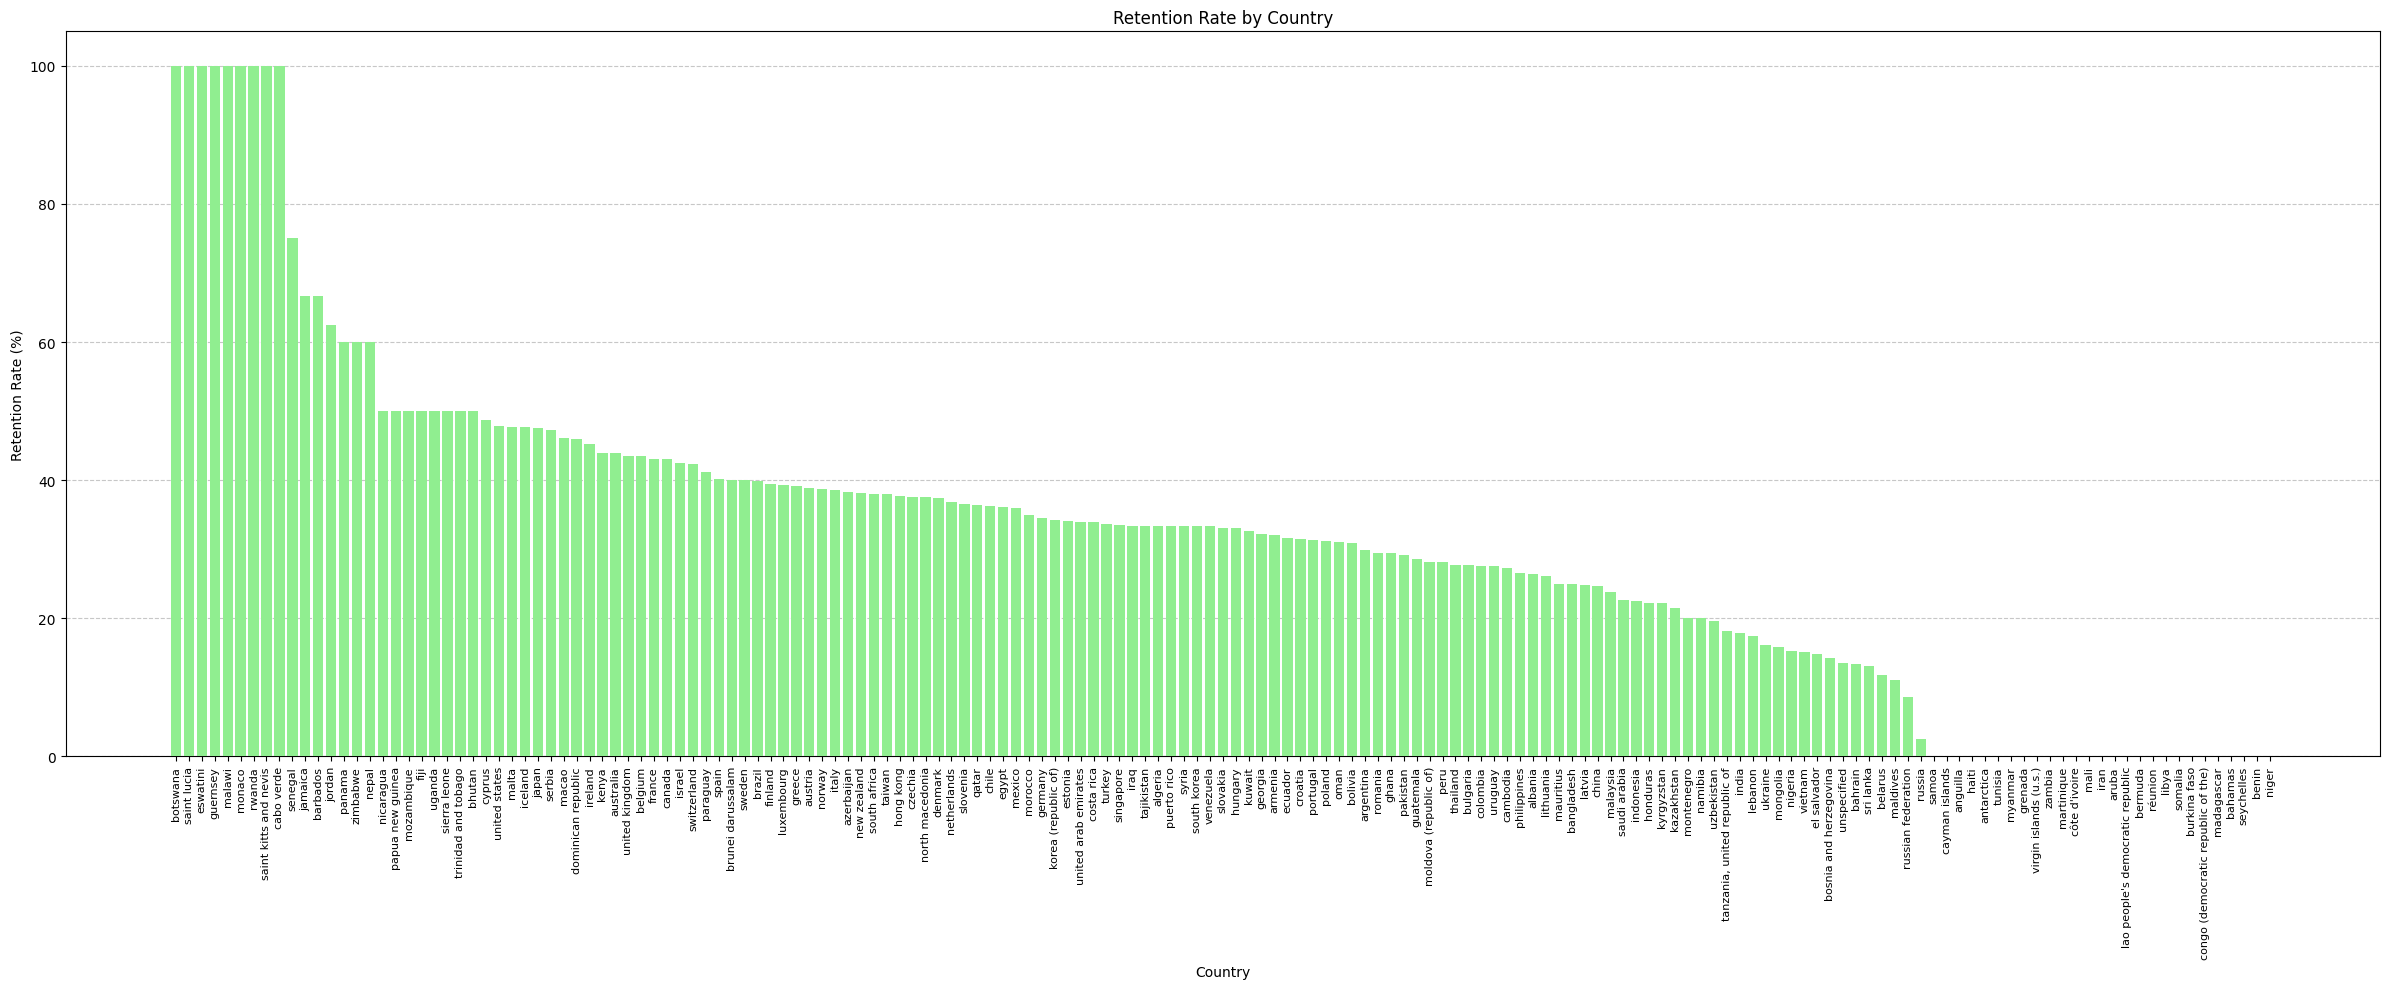

Retention by Geography:
                             total_users  active_users  retention_rate
personal_person_geo_country                                           
botswana                               1             1           100.0
saint lucia                            1             1           100.0
eswatini                               1             1           100.0
guernsey                               1             1           100.0
malawi                                 1             1           100.0
monaco                                 1             1           100.0
rwanda                                 2             2           100.0
saint kitts and nevis                  1             1           100.0
cabo verde                             1             1           100.0
senegal                                4             3            75.0


In [623]:
# ABSOLUTE RETENTION RATES
# Grouping data by geography
data['is_active_num'] = data['is_active'].astype(int)
geo_retention = data.groupby('personal_person_geo_country').agg(
    total_users=('oid', 'size'),
    active_users=('is_active_num', 'sum')
)
geo_retention['retention_rate'] = (geo_retention['active_users'] / geo_retention['total_users']) * 100
geo_retention.sort_values('retention_rate', ascending=False, inplace=True)

# Visualization
plt.figure(figsize=(24, 10))
plt.bar(geo_retention.index, geo_retention['retention_rate'], color='lightgreen', zorder=3)
plt.xlabel('Country')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate by Country')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()

# Output statistics
print("Retention by Geography:")
print(geo_retention[['total_users', 'active_users', 'retention_rate']].head(10))


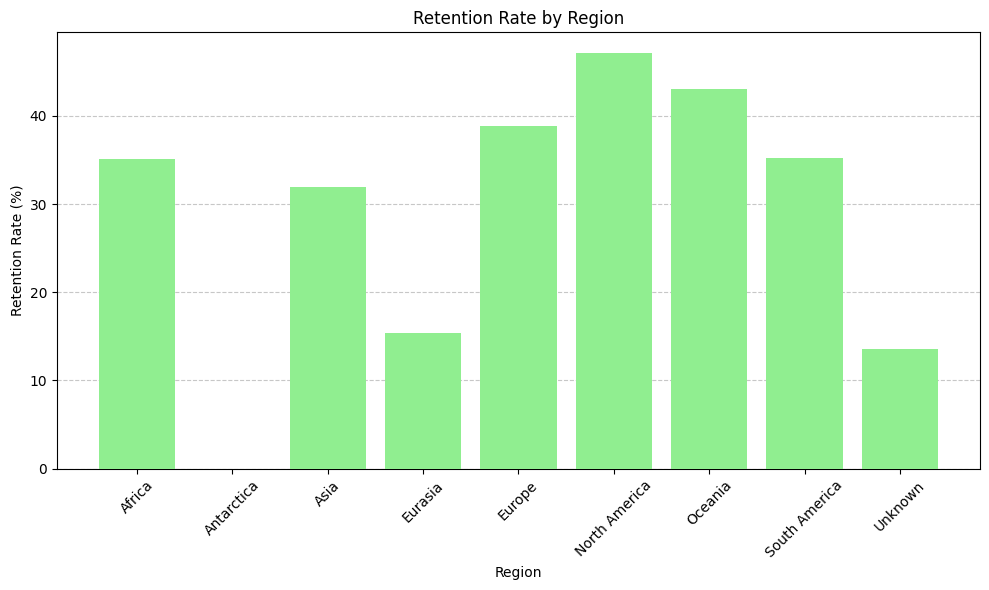

In [624]:
# Mapping of countries to regions
country_to_continent = {
    'spain': 'Europe',
    'czechia': 'Europe',
    'united states': 'North America',
    'italy': 'Europe',
    'australia': 'Oceania',
    'france': 'Europe',
    'switzerland': 'Europe',
    'united kingdom': 'Europe',
    'germany': 'Europe',
    'canada': 'North America',
    'japan': 'Asia',
    'sweden': 'Europe',
    'brazil': 'South America',
    'finland': 'Europe',
    'netherlands': 'Europe',
    'korea (republic of)': 'Asia',
    'iceland': 'Europe',
    'hungary': 'Europe',
    'russian federation': 'Eurasia',
    'ukraine': 'Europe',
    'kuwait': 'Asia',
    'norway': 'Europe',
    'lithuania': 'Europe',
    'hong kong': 'Asia',
    'philippines': 'Asia',
    'new zealand': 'Oceania',
    'poland': 'Europe',
    'denmark': 'Europe',
    'israel': 'Asia',
    'malta': 'Europe',
    'greece': 'Europe',
    'slovenia': 'Europe',
    'south africa': 'Africa',
    'slovakia': 'Europe',
    'mexico': 'North America',
    'china': 'Asia',
    'belarus': 'Europe',
    'trinidad and tobago': 'North America',
    'turkey': 'Eurasia',
    'singapore': 'Asia',
    'india': 'Asia',
    'chile': 'South America',
    'ireland': 'Europe',
    'luxembourg': 'Europe',
    'austria': 'Europe',
    'romania': 'Europe',
    'taiwan': 'Asia',
    'belgium': 'Europe',
    'uruguay': 'South America',
    'saudi arabia': 'Asia',
    'estonia': 'Europe',
    'portugal': 'Europe',
    'united arab emirates': 'Asia',
    'malaysia': 'Asia',
    'croatia': 'Europe',
    'indonesia': 'Asia',
    'qatar': 'Asia',
    'dominican republic': 'North America',
    'vietnam': 'Asia',
    'kyrgyzstan': 'Asia',
    'egypt': 'Africa',
    'bulgaria': 'Europe',
    'thailand': 'Asia',
    'argentina': 'South America',
    'colombia': 'South America',
    'cambodia': 'Asia',
    'peru': 'South America',
    'mongolia': 'Asia',
    'latvia': 'Europe',
    'costa rica': 'North America',
    'moldova (republic of)': 'Europe',
    'georgia': 'Eurasia',
    'sri lanka': 'Asia',
    'pakistan': 'Asia',
    'bahrain': 'Asia',
    'bolivia': 'South America',
    'albania': 'Europe',
    'congo (democratic republic of the)': 'Africa',
    'lebanon': 'Asia',
    'kazakhstan': 'Asia',
    'kenya': 'Africa',
    'serbia': 'Europe',
    'oman': 'Asia',
    'nigeria': 'Africa',
    'myanmar': 'Asia',
    'guatemala': 'North America',
    'el salvador': 'North America',
    'armenia': 'Eurasia',
    'tanzania, united republic of': 'Africa',
    'ecuador': 'South America',
    'macao': 'Asia',
    'honduras': 'North America',
    'montenegro': 'Europe',
    'morocco': 'Africa',
    'panama': 'North America',
    'maldives': 'Asia',
    'cyprus': 'Eurasia',
    'jamaica': 'North America',
    'brunei darussalam': 'Asia',
    'azerbaijan': 'Eurasia',
    'senegal': 'Africa',
    'ghana': 'Africa',
    'paraguay': 'South America',
    'papua new guinea': 'Oceania',
    'anguilla': 'North America',
    'jordan': 'Asia',
    'north macedonia': 'Europe',
    'uzbekistan': 'Asia',
    'zambia': 'Africa',
    'unspecified': 'Unknown',
    'bosnia and herzegovina': 'Europe',
    'russia': 'Eurasia',
    'antarctica': 'Antarctica',
    'bahamas': 'North America',
    'bangladesh': 'Asia',
    'benin': 'Africa',
    'nepal': 'Asia',
    'algeria': 'Africa',
    'venezuela': 'South America',
    'iran': 'Asia',
    'eswatini': 'Africa',
    'barbados': 'North America',
    'bhutan': 'Asia',
    'syria': 'Asia',
    'somalia': 'Africa',
    'niger': 'Africa',
    'rwanda': 'Africa',
    'cayman islands': 'North America',
    'south korea': 'Asia',
    'iraq': 'Asia',
    'guernsey': 'Europe',
    'saint lucia': 'North America',
    'mauritius': 'Africa',
    'cabo verde': 'Africa',
    'tunisia': 'Africa',
    'réunion': 'Africa',
    'namibia': 'Africa',
    'nicaragua': 'North America',
    'puerto rico': 'North America',
    'mozambique': 'Africa',
    'zimbabwe': 'Africa',
    'samoa': 'Oceania',
    'aruba': 'North America',
    'sierra leone': 'Africa',
    'fiji': 'Oceania',
    "lao people's democratic republic": 'Asia',
    'tajikistan': 'Asia',
    'haiti': 'North America',
    'burkina faso': 'Africa',
    'martinique': 'North America',
    'bermuda': 'North America',
    'virgin islands (u.s.)': 'North America',
    "côte d'ivoire": 'Africa',
    'malawi': 'Africa',
    'saint kitts and nevis': 'North America',
    'grenada': 'North America',
    'mali': 'Africa',
    'madagascar': 'Africa',
    'uganda': 'Africa',
    'botswana': 'Africa',
    'monaco': 'Europe',
    'seychelles': 'Africa',
    'libya': 'Africa',
}

# Map countries to continents
data['region'] = data['personal_person_geo_country'].map(country_to_continent)

# Group by region and calculate retention
region_retention = data.groupby('region').agg(
    total_users=('oid', 'size'),
    active_users=('is_active', lambda x: x.sum())
)

# Calculate retention rate
region_retention['retention_rate'] = (region_retention['active_users'] / region_retention['total_users']) * 100

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(region_retention.index, region_retention['retention_rate'], color='lightgreen', zorder=3)
plt.xlabel('Region')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate by Region')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

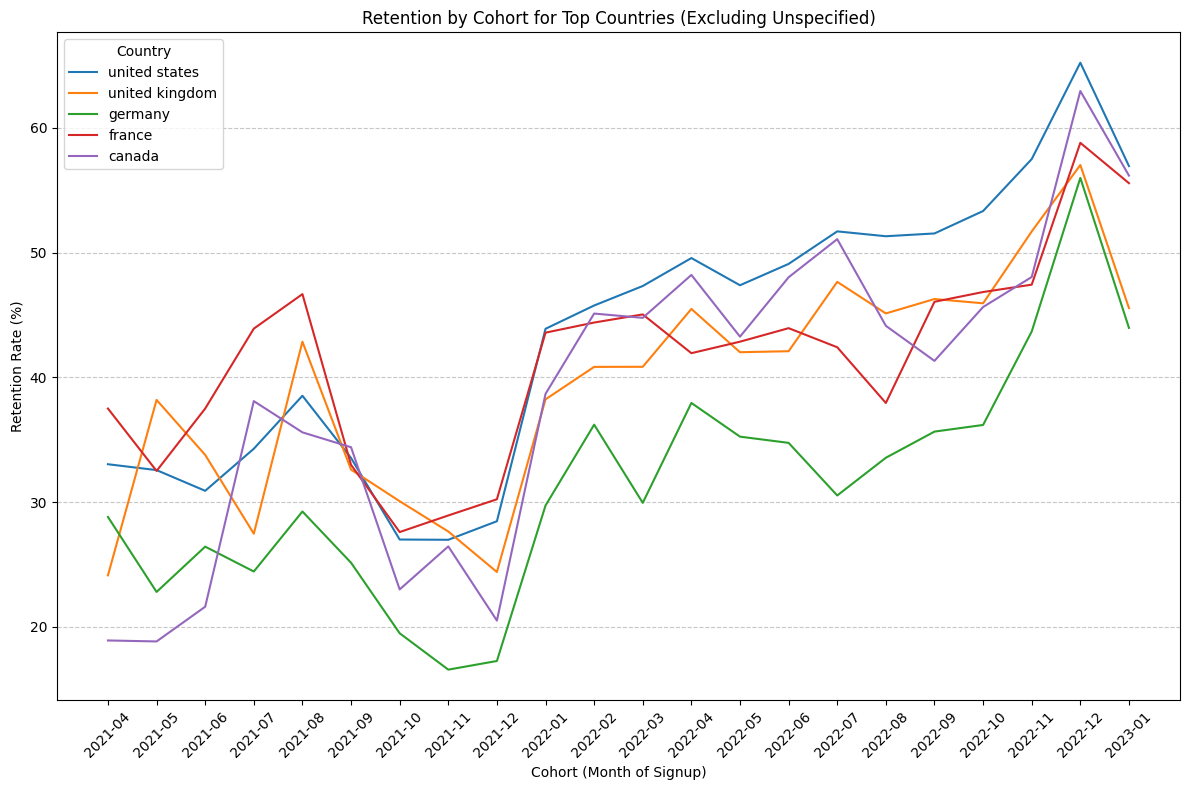

personal_person_geo_country
united states     19248
united kingdom     3829
germany            2889
france             1855
canada             1730
Name: count, dtype: int64


In [625]:
# COHORT-BASED RETENTION RATES
# Focusing on top countries by total user count, excluding 'unspecified'
top_countries = data['personal_person_geo_country'].value_counts()
top_countries = top_countries[top_countries.index != 'unspecified'].head(5).index
top_country_data = data[data['personal_person_geo_country'].isin(top_countries)]

# Calculating cohort-based retention for each top country
cohort_retention_by_country = {}
for country in top_countries:
    country_data = top_country_data[top_country_data['personal_person_geo_country'] == country]
    cohort_sizes = country_data.groupby('cohort_month').size()
    active_on_reference = country_data[country_data['is_active'] == True].groupby('cohort_month').size()
    retention_rates = (active_on_reference / cohort_sizes) * 100
    cohort_retention_by_country[country] = retention_rates

# Visualization
plt.figure(figsize=(12, 8))

for country, retention_rates in cohort_retention_by_country.items():
    plt.plot(retention_rates.index.astype(str), retention_rates.values, label=country)

plt.xlabel('Cohort (Month of Signup)')
plt.ylabel('Retention Rate (%)')
plt.title('Retention by Cohort for Top Countries (Excluding Unspecified)')
plt.legend(title='Country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary active user counts by country
active_users = data[data['is_active'] == True]
top_country_active_users = active_users[active_users['personal_person_geo_country'].isin(top_countries)]
active_users_per_top_country = top_country_active_users['personal_person_geo_country'].value_counts()
print(active_users_per_top_country)

How does retention vary by provider? 

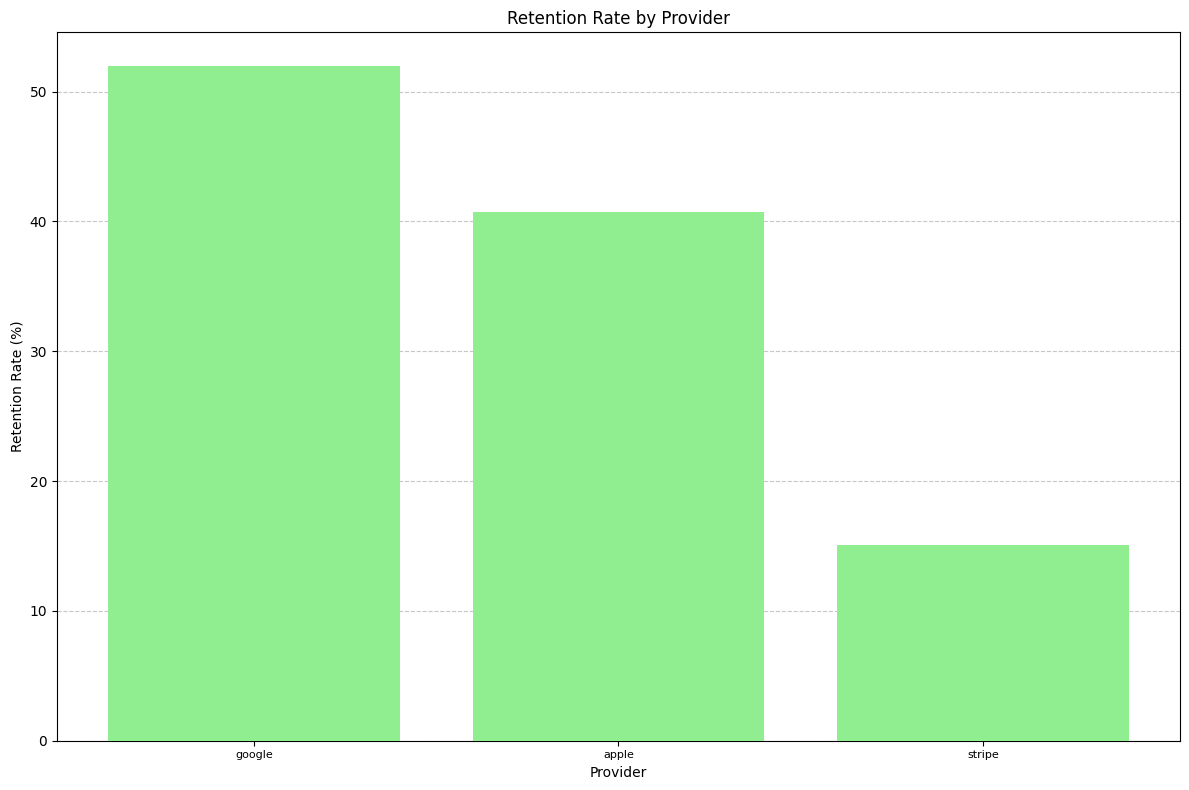

Retention by Provider:
          total_users  active_users  retention_rate
provider                                           
google           4476          2326       51.966041
apple           98026         39906       40.709608
stripe          32108          4837       15.064781


In [626]:
# ABSOLUTE RETENTION RATES
# Grouping data by provider
provider_retention = data.groupby('provider').agg(
    total_users=('oid', 'size'),
    active_users=('is_active_num', 'sum')
)

# Calculating retention rate for each provider
provider_retention['retention_rate'] = (provider_retention['active_users'] / provider_retention['total_users']) * 100
provider_retention.sort_values('retention_rate', ascending=False, inplace=True)

# Visualization
plt.figure(figsize=(12, 8))
plt.bar(provider_retention.index, provider_retention['retention_rate'], color='lightgreen', zorder=3)
plt.xlabel('Provider')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate by Provider')
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()

# Output statistics
print("Retention by Provider:")
print(provider_retention[['total_users', 'active_users', 'retention_rate']].head(10))

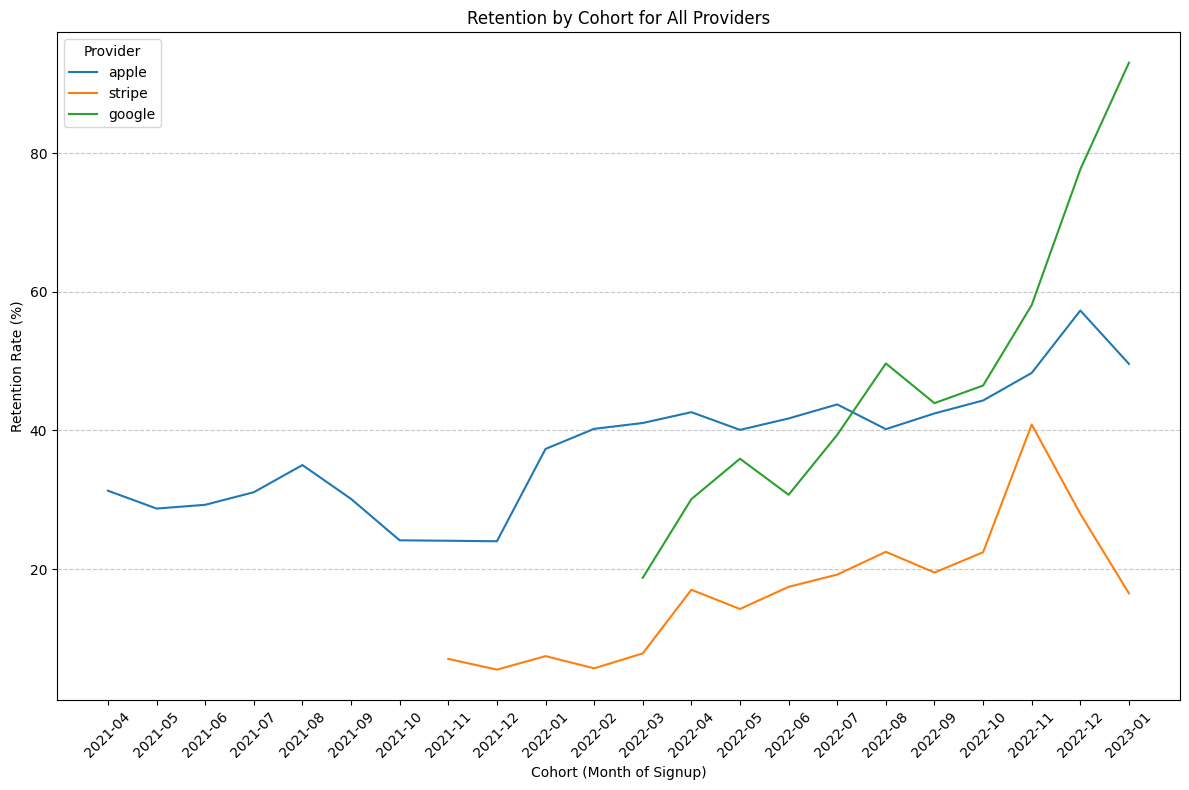

provider
apple     39906
stripe     4837
google     2326
Name: count, dtype: int64


In [627]:
# COHORT-BASED RETENTION RATES
# Calculating cohort-based retention for each provider
cohort_retention_by_provider = {}
for provider in data['provider'].unique():
    provider_data = data[data['provider'] == provider]
    cohort_sizes = provider_data.groupby('cohort_month').size()
    active_on_reference = provider_data[provider_data['is_active'] == True].groupby('cohort_month').size()
    retention_rates = (active_on_reference / cohort_sizes) * 100
    cohort_retention_by_provider[provider] = retention_rates

# Visualization
plt.figure(figsize=(12, 8))

for provider, retention_rates in cohort_retention_by_provider.items():
    plt.plot(retention_rates.index.astype(str), retention_rates.values, label=provider)

plt.xlabel('Cohort (Month of Signup)')
plt.ylabel('Retention Rate (%)')
plt.title('Retention by Cohort for All Providers')
plt.legend(title='Provider')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary active user counts by provider
active_users = data[data['is_active'] == True]
active_users_per_provider = active_users['provider'].value_counts()

print(active_users_per_provider)

# Customer Behavior Analysis
What is the average lifetime value of a customer? How does this differ for specific segments (e.g., geography or provider)?
- Since the percentage of cancellations that later get resurrected is negligible, we do not account for them here. If we had reactivation date data, then we could more accurately calculate these effects. 

In [628]:
# Overall LTV for Converted Customers
overall_avg_ltv = data['total_charges'].mean()
overall_avg_ltv_converted = converted_customers['total_charges'].mean()

print(f"Overall Average LTV: ${overall_avg_ltv:.2f}")
print(f"Overall Average LTV (Converted Customers): ${overall_avg_ltv_converted:.2f}")

Overall Average LTV: $24.86
Overall Average LTV (Converted Customers): $41.26


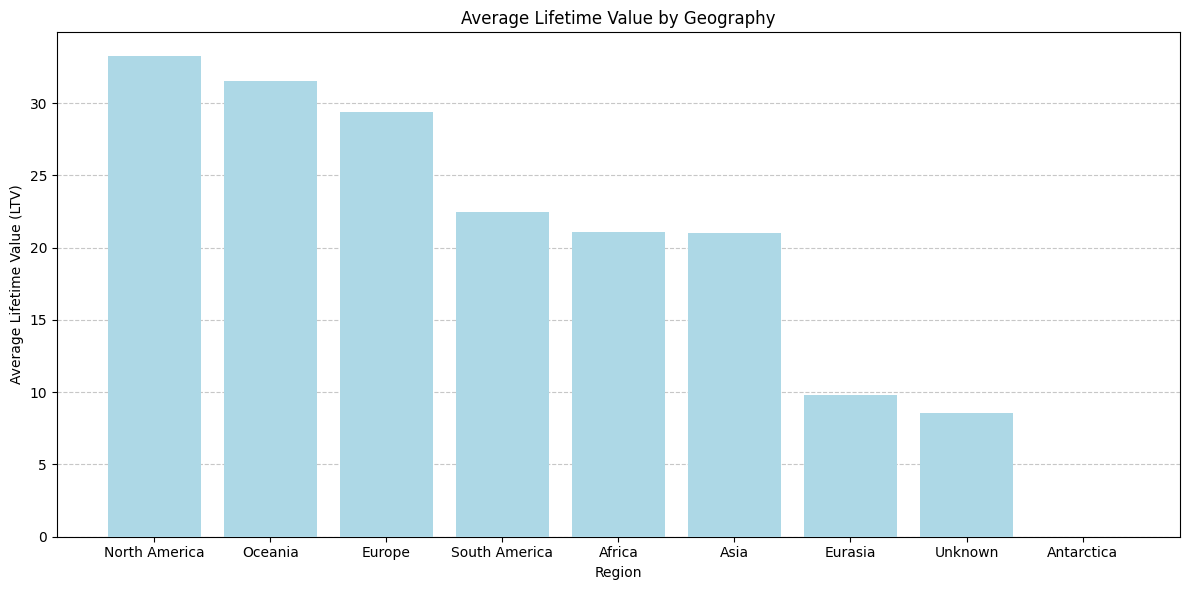

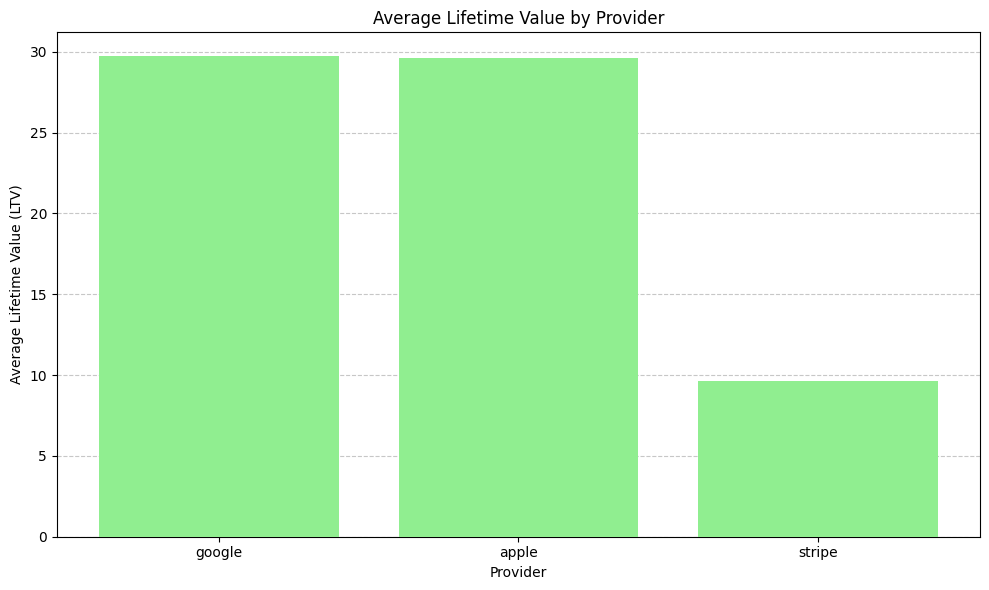

In [629]:
# LTV by geography and provider
ltv_by_geo = data.groupby('region')['total_charges'].mean()
ltv_by_provider = data.groupby('provider')['total_charges'].mean()

# Visualization by geography
plt.figure(figsize=(12, 6))
ltv_by_geo = ltv_by_geo.sort_values(ascending=False)
plt.bar(ltv_by_geo.index, ltv_by_geo.values, color='lightblue', zorder=3)
plt.xticks(fontsize=10)
plt.xlabel('Region')
plt.ylabel('Average Lifetime Value (LTV)')
plt.title('Average Lifetime Value by Geography')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()

# Visualization by provider
plt.figure(figsize=(10, 6))
ltv_by_provider = ltv_by_provider.sort_values(ascending=False)
plt.bar(ltv_by_provider.index, ltv_by_provider.values, color='lightgreen', zorder=3)
plt.xticks(fontsize=10)
plt.xlabel('Provider')
plt.ylabel('Average Lifetime Value (LTV)')
plt.title('Average Lifetime Value by Provider')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()


What does the conversion rate to paid plans look like? What is the typical time lag between signup and conversion?

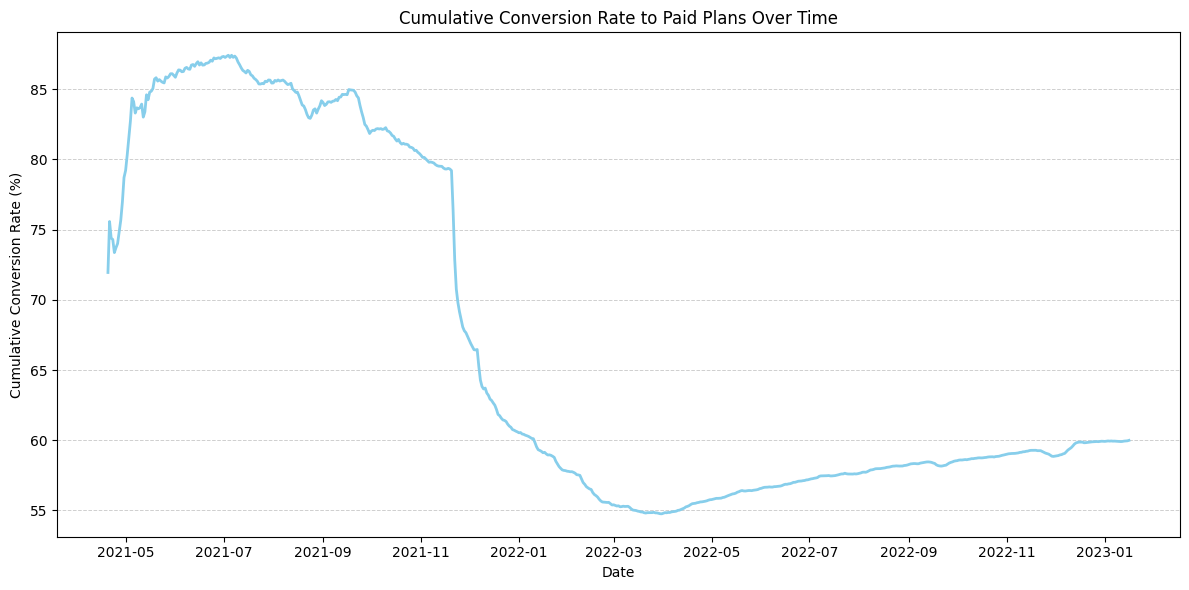

In [630]:
# CUMULATIVE CONVERSION RATE: HOW MANY TOTAL USERS HAVE CONVERTED, BY SOME POINT, TO A PAID PLAN?

total_signups_by_date = data.groupby('signup_date').size()
converted_users_by_date = data[data['converted'] == True].groupby('conversion_date').size()

conversion_data = pd.DataFrame({
    'total_signups': total_signups_by_date,
    'converted_users': converted_users_by_date
}).fillna(0)

# Calculating cumulative totals for signups and conversions over time
conversion_data['cumulative_signups'] = conversion_data['total_signups'].cumsum()
conversion_data['cumulative_conversions'] = conversion_data['converted_users'].cumsum()

# Calculating the conversion rate as the percentage of cumulative conversions
conversion_data['conversion_rate'] = (conversion_data['cumulative_conversions'] / conversion_data['cumulative_signups']) * 100

# Visualization of rate over time
plt.figure(figsize=(12, 6))
plt.plot(conversion_data.index, conversion_data['conversion_rate'], color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Conversion Rate (%)')
plt.title('Cumulative Conversion Rate to Paid Plans Over Time')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()


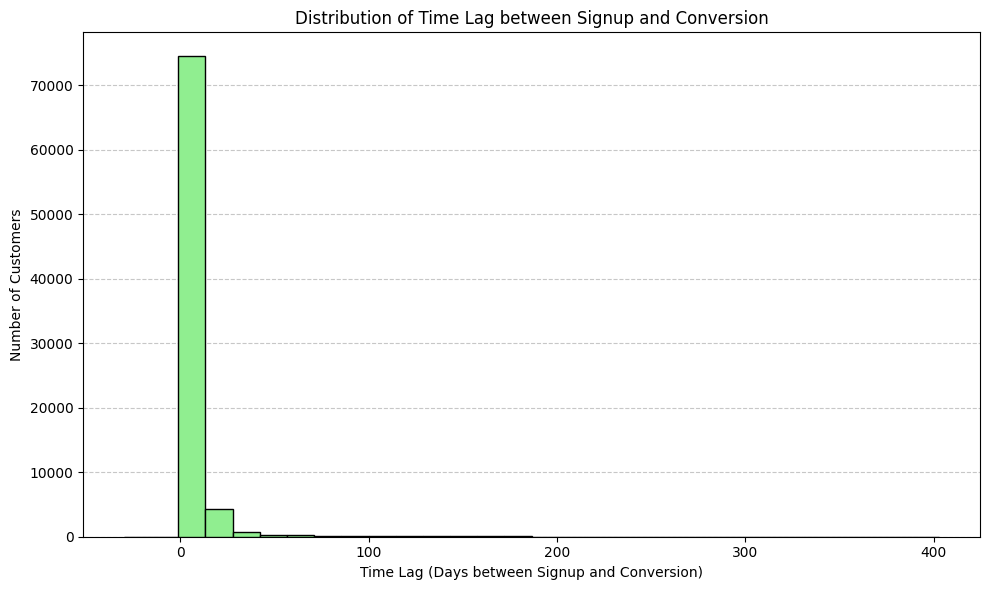

Average time lag between signup and conversion: 5.06 days
Median time lag between signup and conversion: 0.00 days
Minimum time lag between signup and conversion: -30 days
Maximum time lag between signup and conversion: 403 days


In [631]:
# Calculating the time lag (in days) between signup and conversion
converted_customers = converted_customers.copy()
converted_customers['signup_to_conversion'] = (
    converted_customers['conversion_date'] - converted_customers['signup_date']
).dt.days

# Visualizing the distribution of time lag
plt.figure(figsize=(10, 6))
plt.hist(converted_customers['signup_to_conversion'], bins=30, color='lightgreen', edgecolor='black', zorder=3)
plt.xlabel('Time Lag (Days between Signup and Conversion)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Time Lag between Signup and Conversion')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Average time lag between signup and conversion: {converted_customers['signup_to_conversion'].mean():.2f} days")
print(f"Median time lag between signup and conversion: {converted_customers['signup_to_conversion'].median():.2f} days")
print(f"Minimum time lag between signup and conversion: {converted_customers['signup_to_conversion'].min()} days")
print(f"Maximum time lag between signup and conversion: {converted_customers['signup_to_conversion'].max()} days")


In [632]:
# Extracting data entries where conversion_date is earlier than signup_date for review
invalid_conversion_data = data[data['conversion_date'] < data['signup_date']]
invalid_conversion_data.head() # Could be a data entry error? Unsure why conversion date is earlier than signup for these


,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted,cohort_month,cohort_week,cohort_day,is_active_num,region
112561,GPA.3319-9266-5306-16298,google,8.38,2022-11-19,True,False,False,2022-11-18,2022-11-19 05:57:03+00:00,0.0,south africa,True,2022-11,2022-11-14/2022-11-20,2022-11-19,0,Africa
114687,GPA.3371-4654-4661-23422,google,64.83,2022-11-23,True,False,False,2022-11-18,2022-11-23 17:04:11+00:00,0.0,singapore,True,2022-11,2022-11-21/2022-11-27,2022-11-23,0,Asia
118308,GPA.3382-4129-7346-60151,google,7.66,2022-11-30,True,False,False,2022-10-31,2022-11-30 03:48:52+00:00,0.0,kazakhstan,True,2022-11,2022-11-28/2022-12-04,2022-11-30,0,Asia
119869,GPA.3320-6651-1101-76785,google,68.50,2022-12-03,True,False,False,2022-12-02,2022-12-03 05:37:48+00:00,0.0,chile,True,2022-12,2022-11-28/2022-12-04,2022-12-03,0,South America
120013,GPA.3323-1437-1808-23231,google,57.86,2022-12-04,True,False,False,2022-12-03,2022-12-04 19:20:17+00:00,0.0,brazil,True,2022-12,2022-11-28/2022-12-04,2022-12-04,0,South America


For those that cancel their paid plans, what is the time lag between conversion and cancellation?

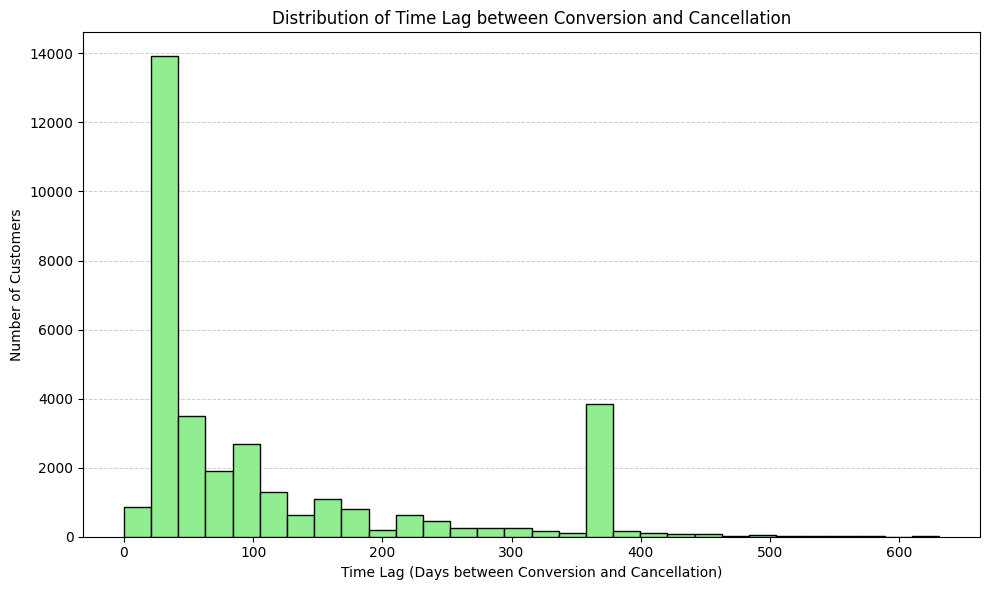

Average time lag between conversion and cancellation: 115.04 days
Median time lag between conversion and cancellation: 61.00 days
Minimum time lag between conversion and cancellation: 0 days
Maximum time lag between conversion and cancellation: 631 days


In [633]:
# Filtering for customers who have converted and canceled their paid plan
canceled_customers = data[(data['converted'] == True) & (data['is_canceled'] == True)].copy()

# Removing timezone information
canceled_customers.loc[:, 'cancellation_date'] = canceled_customers['cancellation_date'].dt.tz_localize(None)

# Calculating the time lag (in days) between conversion and cancellation
canceled_customers.loc[:, 'time_lag'] = (canceled_customers['cancellation_date'] - canceled_customers['conversion_date']).dt.days

# Visualizing the distribution of time lag
plt.figure(figsize=(10, 6))
plt.hist(canceled_customers['time_lag'], bins=30, color='lightgreen', edgecolor='black', zorder=3)
plt.xlabel('Time Lag (Days between Conversion and Cancellation)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Time Lag between Conversion and Cancellation')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)
plt.tight_layout()
plt.show()

# Summary Statistics
print(f"Average time lag between conversion and cancellation: {canceled_customers['time_lag'].mean():.2f} days")
print(f"Median time lag between conversion and cancellation: {canceled_customers['time_lag'].median():.2f} days")
print(f"Minimum time lag between conversion and cancellation: {canceled_customers['time_lag'].min()} days")
print(f"Maximum time lag between conversion and cancellation: {canceled_customers['time_lag'].max()} days")

Do delinquency rates rise as time since signup increases?

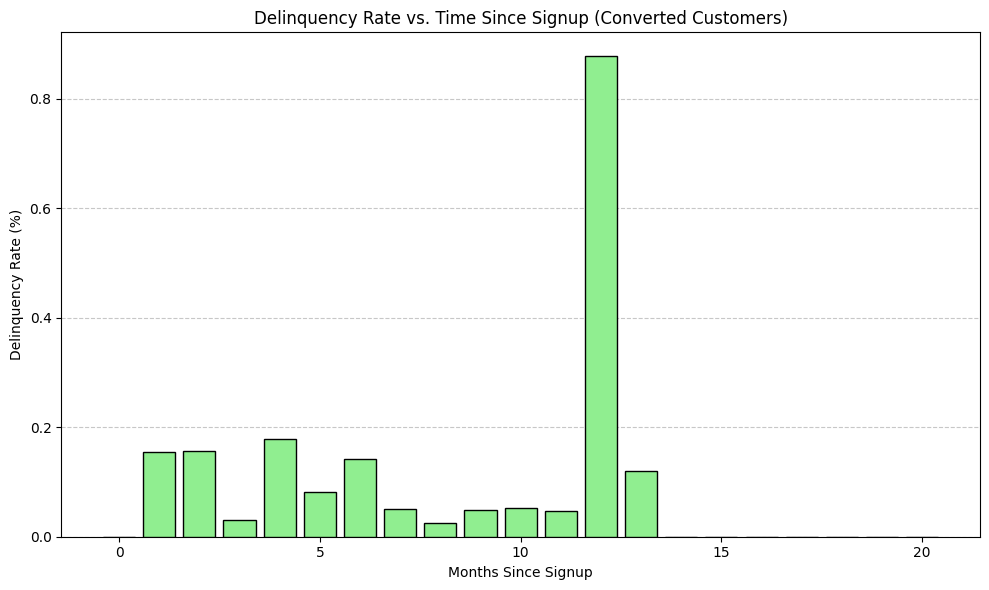

                     total_users delinquent_users delinquency_rate
months_since_signup                                               
0                           5473                0              0.0
1                           8378               13         0.155168
2                           7666               12         0.156535
3                           6536                2           0.0306
4                           4457                8         0.179493
5                           4865                4          0.08222
6                           4211                6         0.142484
7                           4000                2             0.05
8                           3860                1         0.025907
9                           4045                2         0.049444


In [634]:
# Filtered to only customers with paid plans (converted users)
# Calculating time since signup (in months), using last recorded data entry date as a reference point
converted_customers.loc[:, 'months_since_signup'] = (
    (reference_date - converted_customers['signup_date']) / np.timedelta64(1, 'M')
).astype(int)

# Grouping data by months since signup and calculating delinquency rate
delinquency_data = converted_customers.groupby('months_since_signup').agg(
    total_users=('oid', 'size'),
    delinquent_users=('is_delinquent', 'sum')
)

delinquency_data['delinquency_rate'] = (delinquency_data['delinquent_users'] / delinquency_data['total_users']) * 100

# Visualizing as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(delinquency_data.index, delinquency_data['delinquency_rate'], color='lightgreen', edgecolor='black', zorder=3)
plt.xlabel('Months Since Signup')
plt.ylabel('Delinquency Rate (%)')
plt.title('Delinquency Rate vs. Time Since Signup (Converted Customers)')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()

# Output statistics
print(delinquency_data[['total_users', 'delinquent_users', 'delinquency_rate']].head(10)) 

What percentage of delinquent users eventually churn?

In [635]:
# Filtering to only delinquent users
delinquent_users = data[data['is_delinquent'] == True]

# Checking for delinquent users who have cancelled their plans at some point
delinquent_cancel = delinquent_users[delinquent_users['cancellation_date'].notnull()]
print(f"Number of delinquent users with a non-null cancellation date: {len(delinquent_cancel)}")

# Identifying if delinquent users churned (canceled and have no reactivation)
delinquent_churned = delinquent_cancel[delinquent_cancel['is_canceled'] == True]
print(f"Number of churned delinquent users: {len(delinquent_churned)}")

Number of delinquent users with a non-null cancellation date: 7
Number of churned delinquent users: 0


# Churn and Resurrection
Among customers who cancel their paid plans, what percentage reactivate their subscriptions later? How long does it typically take for customers to reactivate?
- For our purposes, we'll consider resurrected customers to be those who have canceled their subscriptions at some point (i.e. have a valid cancellation date), but have an active paid plan (is_active == True) at a point after their cancellation date. This assumes that customers can reactivate their paid plans under the same customer id.
- Would need reactivation date data to calculate the time lag between cancellation and reactivation.

In [636]:
# Filtering customers who have canceled their subscriptions at some point (valid cancellation date)
canceled_customers = data[data['cancellation_date'].notna()]

# Finding resurrected customers (is_active == True after cancellation date)
resurrected_customers = canceled_customers[canceled_customers['is_active'] == True]

# Calculating resurrection rate
total_canceled = canceled_customers.shape[0]
total_resurrected = resurrected_customers.shape[0]
resurrection_percentage = (total_resurrected / total_canceled) * 100
print(f'Resurrection percentage: {resurrection_percentage:.2f}%')

Resurrection percentage: 0.26%


Are there identifiable patterns among customers who churn (e.g., geography, provider, payment delinquency)? Does seasonality affect churn rates?
- See sections above for analysis of retention/churn patterns by geography, provider, and delinquency.
- See below for seasonality analysis. We track cancellation dates to see if there is any clear trend (note: since the percentage of resurrected customers is small, we do not account for this here). Graphed alongside cancellations are signups per month (i.e. new users engaged) and conversions per month (i.e. users "retained").

/var/folders/7q/p2y2lph10_g5dtx7_zb058100000gn/T/ipykernel_11377/148097022.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['cancellation_month'] = data['cancellation_date'].dt.to_period('M')


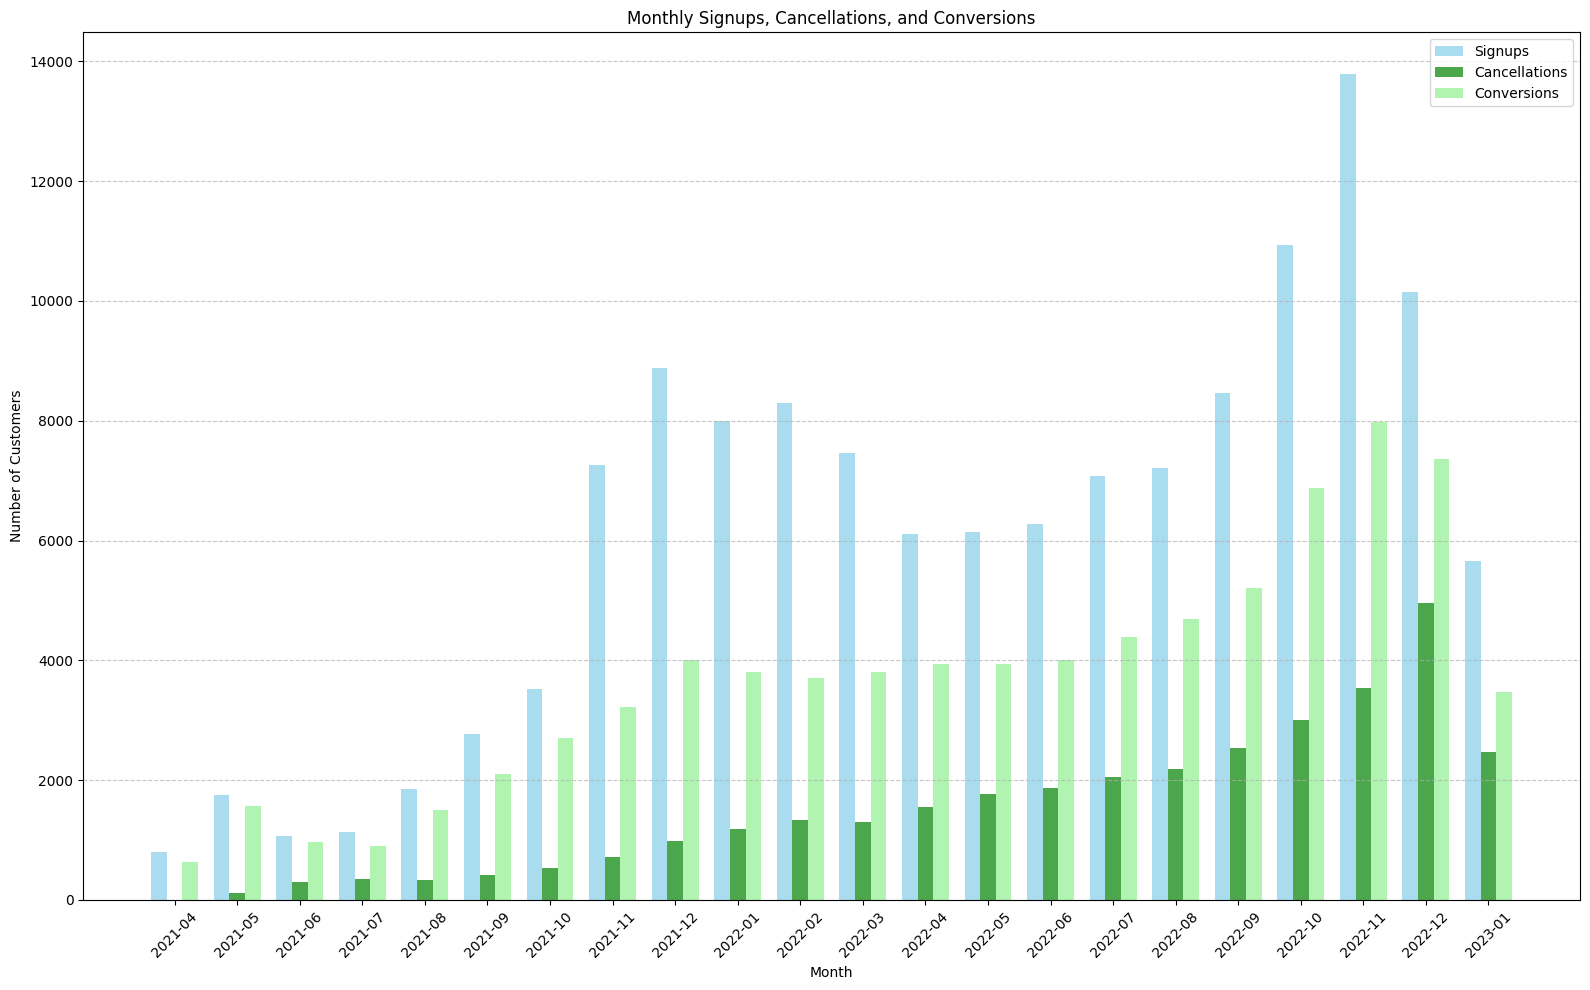

Signups by Month:
2021-04      808
2021-05     1747
2021-06     1069
2021-07     1129
2021-08     1848
2021-09     2765
2021-10     3519
2021-11     7258
2021-12     8884
2022-01     7998
2022-02     8302
2022-03     7466
2022-04     6116
2022-05     6148
2022-06     6279
2022-07     7072
2022-08     7209
2022-09     8472
2022-10    10929
2022-11    13795
2022-12    10144
2023-01     5653
Freq: M, dtype: int64

Cancellations by Month:
2021-04       0
2021-05     109
2021-06     301
2021-07     344
2021-08     330
2021-09     415
2021-10     542
2021-11     721
2021-12     985
2022-01    1185
2022-02    1333
2022-03    1304
2022-04    1549
2022-05    1770
2022-06    1864
2022-07    2055
2022-08    2195
2022-09    2542
2022-10    2999
2022-11    3546
2022-12    4953
2023-01    2476
Freq: M, dtype: int64

Conversions by Month:
2021-04     636
2021-05    1561
2021-06     967
2021-07     897
2021-08    1496
2021-09    2109
2021-10    2697
2021-11    3215
2021-12    4013
2022-01    3809
2022

In [637]:
# Counting signups, conversions, and cancellations per month
data['signup_month'] = data['signup_date'].dt.to_period('M')
data['conversion_month'] = data['conversion_date'].dt.to_period('M')
data['cancellation_month'] = data['cancellation_date'].dt.to_period('M')

signups_by_month = data.groupby('signup_month').size()
cancellations_by_month = data[data['cancellation_date'].notna()].groupby('cancellation_month').size()
conversions_by_month = data[data['conversion_date'].notna()].groupby('conversion_month').size()

# Aligning datasets and plotting
all_months = signups_by_month.index.union(cancellations_by_month.index).union(conversions_by_month.index).sort_values()
signups_by_month = signups_by_month.reindex(all_months, fill_value=0)
cancellations_by_month = cancellations_by_month.reindex(all_months, fill_value=0)
conversions_by_month = conversions_by_month.reindex(all_months, fill_value=0)

x = np.arange(len(all_months))
width = 0.25
plt.figure(figsize=(16, 10))
plt.bar(x - width, signups_by_month.values, width, label='Signups', color='skyblue', alpha=0.7)
plt.bar(x, cancellations_by_month.values, width, label='Cancellations', color='green', alpha=0.7)
plt.bar(x + width, conversions_by_month.values, width, label='Conversions', color='lightgreen', alpha=0.7)

# Plot formatting
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Monthly Signups, Cancellations, and Conversions')
plt.xticks(ticks=x, labels=all_months.astype(str), rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Output data for reference
print("Signups by Month:")
print(signups_by_month)
print("\nCancellations by Month:")
print(cancellations_by_month)
print("\nConversions by Month:")
print(conversions_by_month)


# Revenue Analysis
How does customer retention compare with revenue retention?
- Using total_charges/months_since_conversion as a proxy for MRR at conversion, we compare the initial monthly revenue of a starting cohort and the current monthly revenue of that cohort to get a sense of revenue retention.
- We've already built out customer retention by cohort above. See revenue retention by cohort below, as well as a combined bar chart.


Revenue Retention by Cohort (Including Reactivated Customers):
   cohort_month    initial_mrr  current_mrr  revenue_retention_rate
0       2021-04    1978.485212      1046.24               52.880860
1       2021-05    4138.455418      2161.90               52.239297
2       2021-06    2946.251507      1326.11               45.010075
3       2021-07    2853.032427      1350.57               47.338053
4       2021-08    5411.481018      2602.59               48.093858
5       2021-09    8153.303931      3576.23               43.862341
6       2021-10   12135.879809      5136.64               42.326062
7       2021-11   17226.688460      6841.56               39.714888
8       2021-12   18403.309164      7208.32               39.168608
9       2022-01   17121.018071     11061.93               64.610235
10      2022-02   16766.971116     11549.29               68.881195
11      2022-03   18230.105063     11631.33               63.802869
12      2022-04   20858.785091     12602.61         

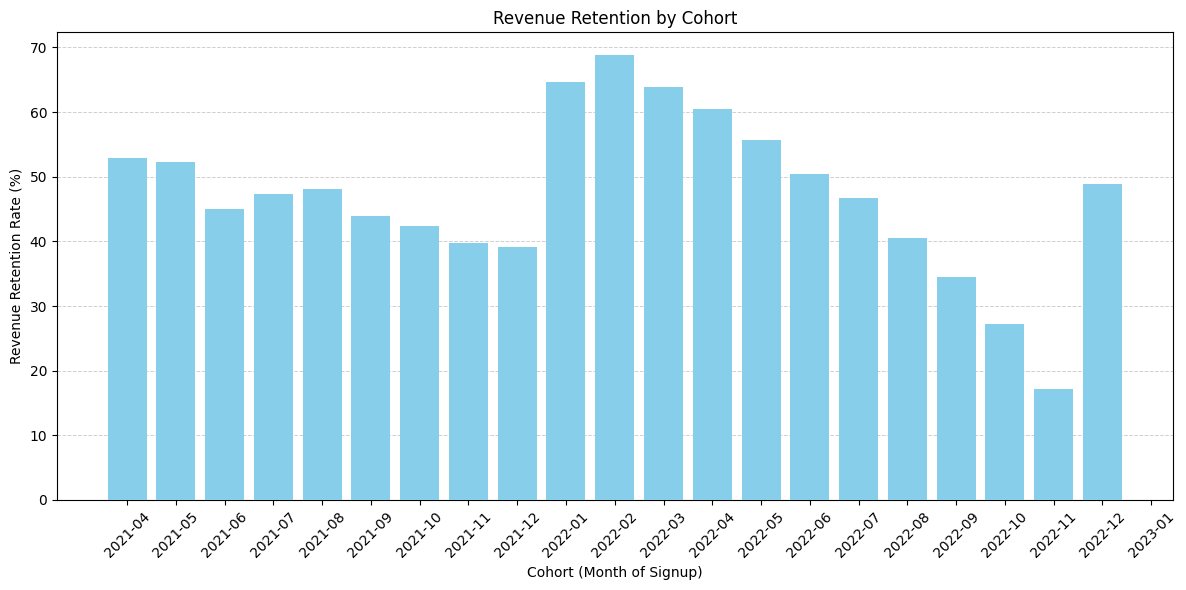

In [638]:
# Calculating months since paid plan conversion for each customer
data['months_since_conversion'] = (
    (reference_date - data['conversion_date']) / np.timedelta64(1, 'M')
)

data['months_since_conversion'] = data['months_since_conversion'].fillna(0).astype(int)

# Calculating initial MRR for each customer
data['initial_mrr'] = np.where(
    data['months_since_conversion'] > 0, 
    data['total_charges'] / data['months_since_conversion'], 
    0  # If no conversion or invalid months (i.e. started plan in Jan 2023), set initial MRR to 0
)

# Calculating total initial MRR and current MRR by cohort
revenue_data = data.groupby('cohort_month').agg(
    initial_mrr=('initial_mrr', 'sum'), # Total initial MRR for the cohort
    current_mrr=('current_mrr', 'sum')  # Total current MRR for active customers from that cohort
).reset_index()

# Calculating revenue retention rate
revenue_data['revenue_retention_rate'] = (
    revenue_data['current_mrr'] / revenue_data['initial_mrr'] * 100
)

# Checking cohort metrics
print("\nRevenue Retention by Cohort (Including Reactivated Customers):")
print(revenue_data)

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(revenue_data['cohort_month'].astype(str), revenue_data['revenue_retention_rate'], color='skyblue', zorder=3)
plt.xlabel('Cohort (Month of Signup)')
plt.ylabel('Revenue Retention Rate (%)')
plt.title('Revenue Retention by Cohort')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)
plt.tight_layout()
plt.show()


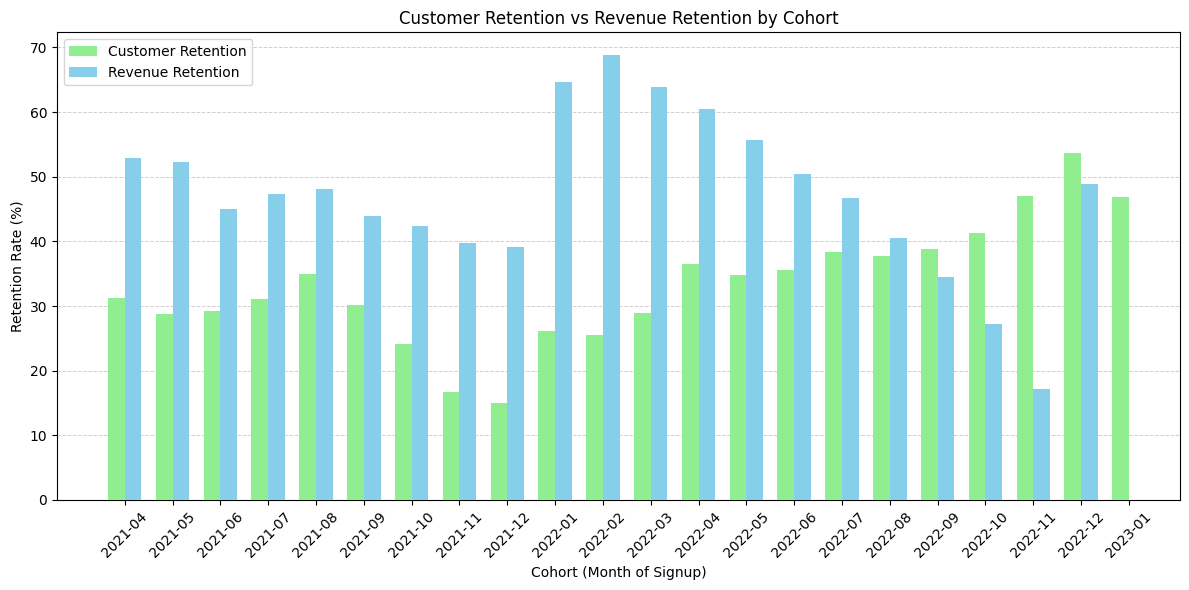

In [639]:
# COMPARING CUSTOMER RETENTION AND REVENUE RETENTION
# Merging customer retention and revenue retention into a single DataFrame
combined_data = pd.DataFrame({
    'cohort_month': m_retention.index,
    'customer_retention': m_retention.values,
}).merge(
    revenue_data[['cohort_month', 'revenue_retention_rate']],
    on='cohort_month',
    how='inner'
)

# Plotting side-by-side bar chart
x = np.arange(len(combined_data['cohort_month'])) 
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(
    x - width/2, combined_data['customer_retention'], width, label='Customer Retention', color='lightgreen', zorder=3
)
bars2 = ax.bar(
    x + width/2, combined_data['revenue_retention_rate'], width, label='Revenue Retention', color='skyblue', zorder=3
)

ax.set_xlabel('Cohort (Month of Signup)')
ax.set_ylabel('Retention Rate (%)')
ax.set_title('Customer Retention vs Revenue Retention by Cohort')
ax.set_xticks(x)
ax.set_xticklabels(combined_data['cohort_month'].astype(str), rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6, zorder=0)

plt.tight_layout()
plt.show()

Is there evidence of revenue expansion at the customer level?
- Since we only have the current MRR for each customer, we can track the evolution of MRR at the customer level by comparing the number of months a customer has been paying and their total_charge to current_mrr ratio (which shows the number of months they would have paid for if they were paying at the current_mrr for their entire customer lifetime thus far).

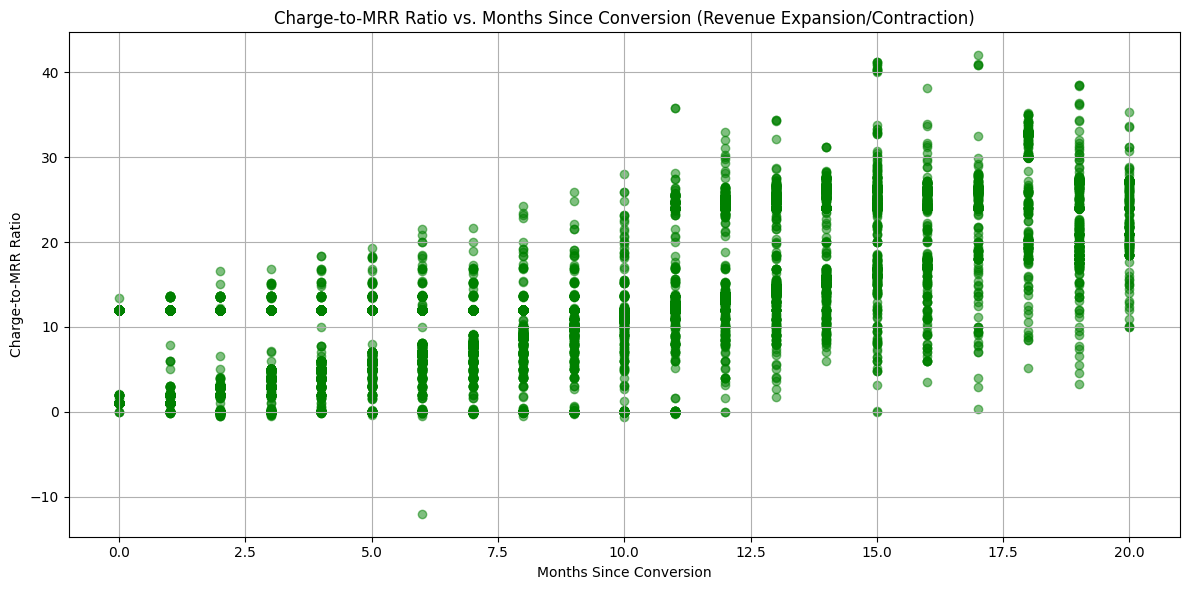

Customers with expansion in spending: 43992
Customers with contraction in spending: 2599
Customers with no change in spending: 478


In [640]:
# Filtering only converted, active customers (to avoid noise from cancelled plans, where revenue will obviously have contracted)
converted_active_customers = data[(data['converted'] == True) & (data['is_active'] == True)].copy()

converted_active_customers['months_since_conversion'] = (
    (reference_date - converted_active_customers['conversion_date']) / np.timedelta64(1, 'M')
).astype(int)

# Calculating total charge to MRR ratio
converted_active_customers['charge_to_mrr_ratio'] = converted_active_customers['total_charges'] / converted_active_customers['current_mrr']

# Calculating the difference between charge to MRR ratio and months since signup
converted_active_customers['month_diff'] = converted_active_customers['charge_to_mrr_ratio'] - converted_active_customers['months_since_conversion']

# A positive value in 'month_diff' means the customer has expanded their spending, a negative value means they've contracted
converted_active_customers['spending_trend'] = converted_active_customers['month_diff'].apply(lambda x: 'Expansion' if x > 0 else ('Contraction' if x < 0 else 'No Change'))

# Visualization of relationship between charge to MRR ratio and months since signup
plt.figure(figsize=(12, 6))
plt.scatter(converted_active_customers['months_since_conversion'], converted_active_customers['charge_to_mrr_ratio'], alpha=0.5, color='green')
plt.xlabel('Months Since Conversion')
plt.ylabel('Charge-to-MRR Ratio')
plt.title('Charge-to-MRR Ratio vs. Months Since Conversion (Revenue Expansion/Contraction)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
expansion_customers = converted_active_customers[converted_active_customers['spending_trend'] == 'Expansion']
contraction_customers = converted_active_customers[converted_active_customers['spending_trend'] == 'Contraction']
no_change_customers = converted_active_customers[converted_active_customers['spending_trend'] == 'No Change']

print(f"Customers with expansion in spending: {expansion_customers.shape[0]}")
print(f"Customers with contraction in spending: {contraction_customers.shape[0]}")
print(f"Customers with no change in spending: {no_change_customers.shape[0]}")

Are there different spending trends for different customer cohorts over time?
- We can examine average MRR across starting cohorts to track how current MRR is different for active users who signed up at different points in time -- these results might indicate more successful upselling/cross-selling or flexible price increases in later cohorts.

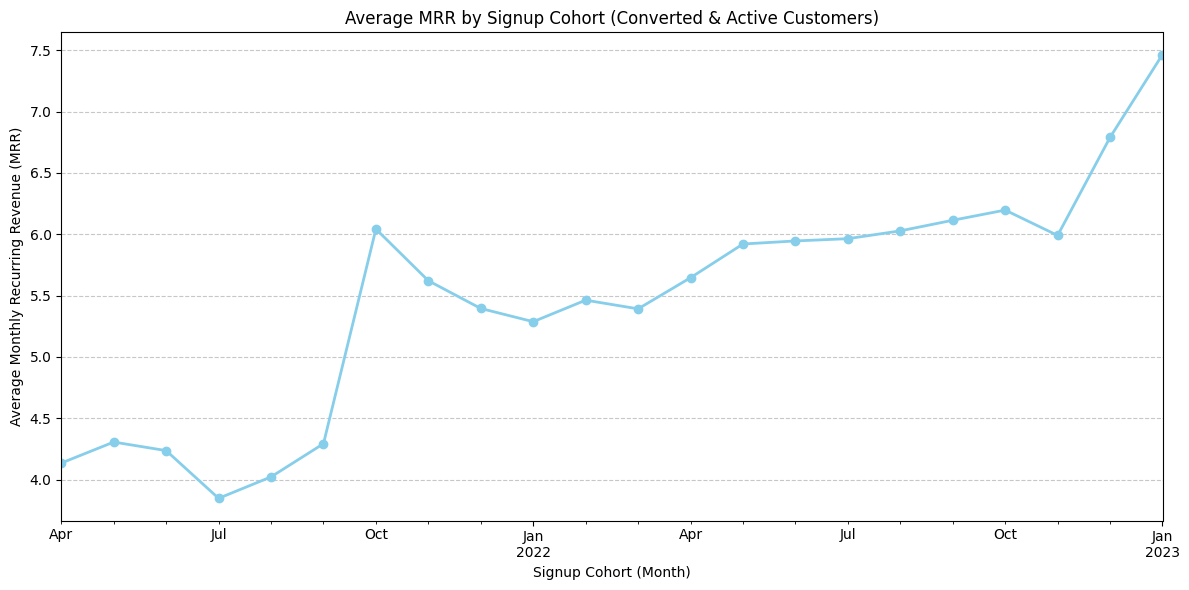

Overall Average MRR: $5.95
Highest Average MRR Cohort: 2023-01 ($7.47)
Lowest Average MRR Cohort: 2021-07 ($3.85)


In [641]:
converted_active_customers['signup_month'] = converted_active_customers['signup_date'].dt.to_period('M')

# Calculating average MRR by starting cohort
average_mrr_by_cohort = (
    converted_active_customers.groupby('signup_month')['current_mrr']
    .mean()
    .sort_index()
)

# Visualization
plt.figure(figsize=(12, 6))
average_mrr_by_cohort.plot(kind='line', marker='o', color='skyblue', linewidth=2)
plt.xlabel('Signup Cohort (Month)')
plt.ylabel('Average Monthly Recurring Revenue (MRR)')
plt.title('Average MRR by Signup Cohort (Converted & Active Customers)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Overall Average MRR: ${converted_active_customers['current_mrr'].mean():.2f}")
print(f"Highest Average MRR Cohort: {average_mrr_by_cohort.idxmax()} (${average_mrr_by_cohort.max():.2f})")
print(f"Lowest Average MRR Cohort: {average_mrr_by_cohort.idxmin()} (${average_mrr_by_cohort.min():.2f})")
